<a href="https://colab.research.google.com/github/vari76/AndroidSem721/blob/main/Assignment3__Unsupervised_Learning_%E2%80%93_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64




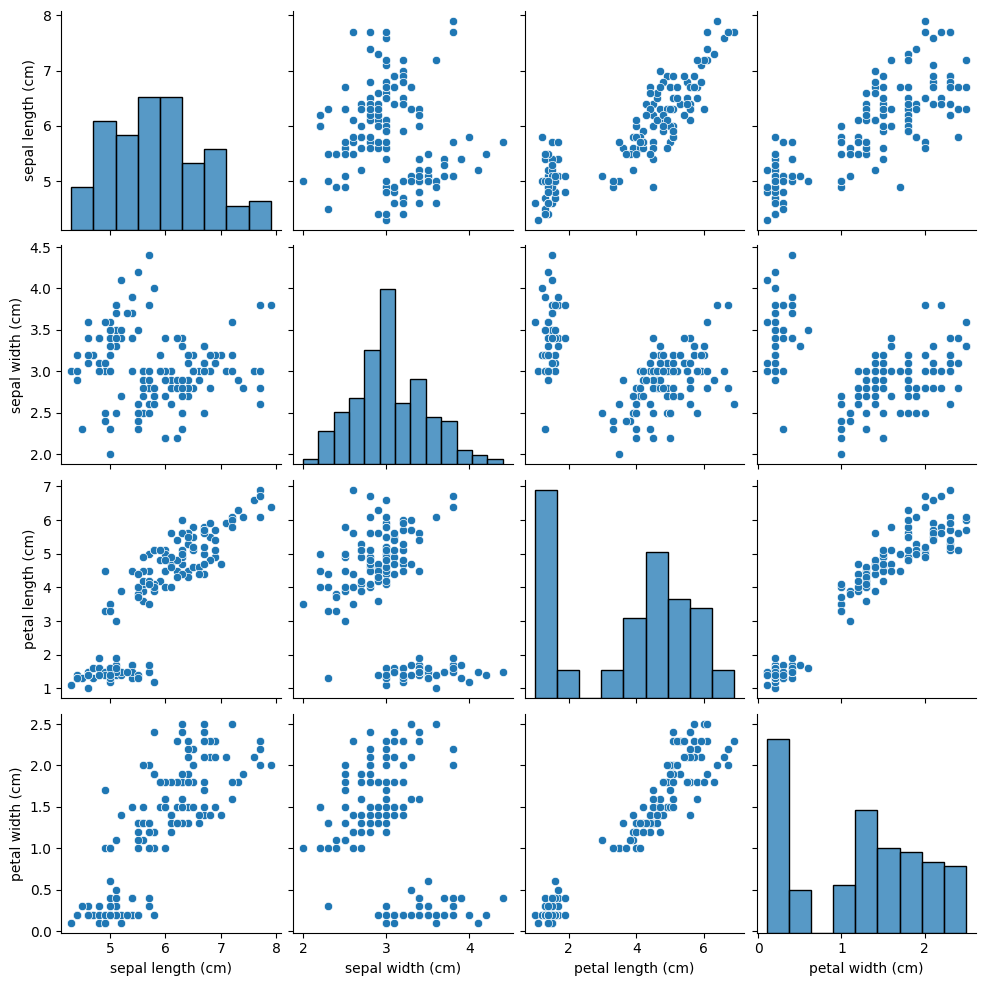

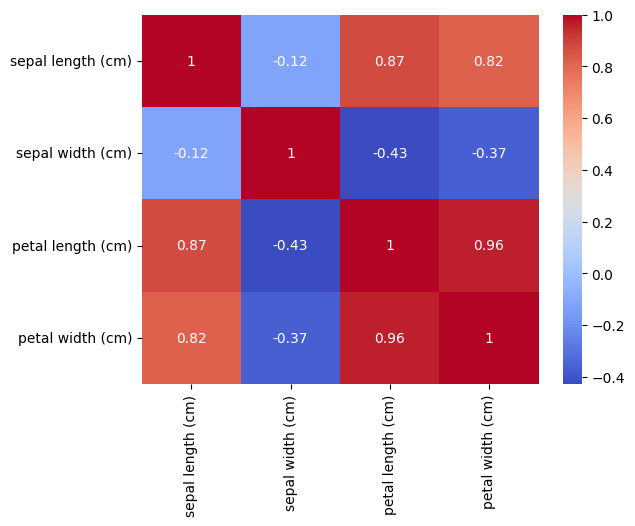

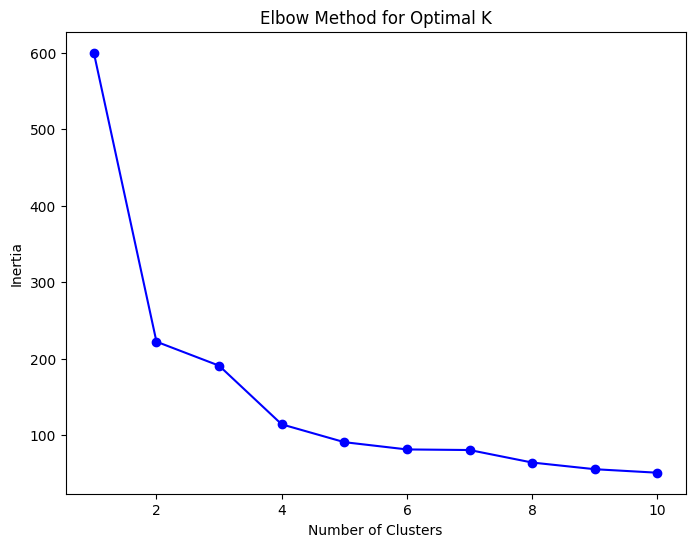

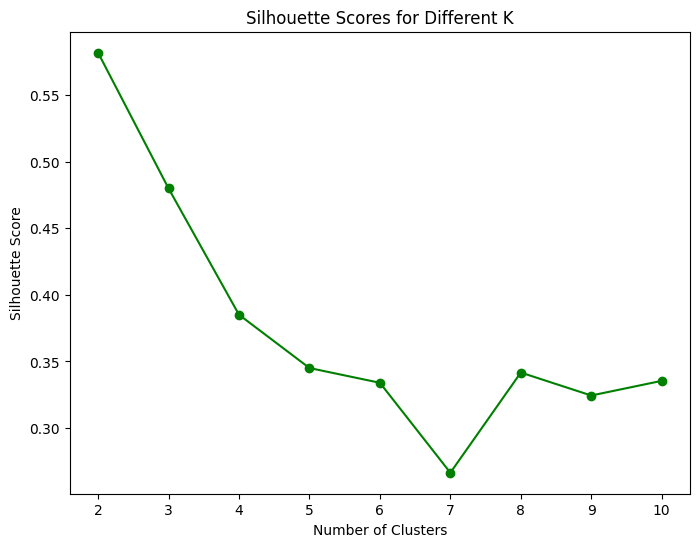


Cluster Centroids:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]



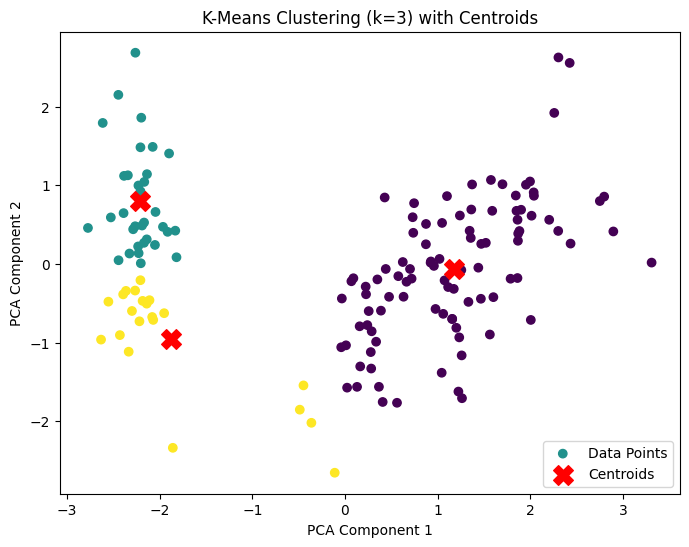

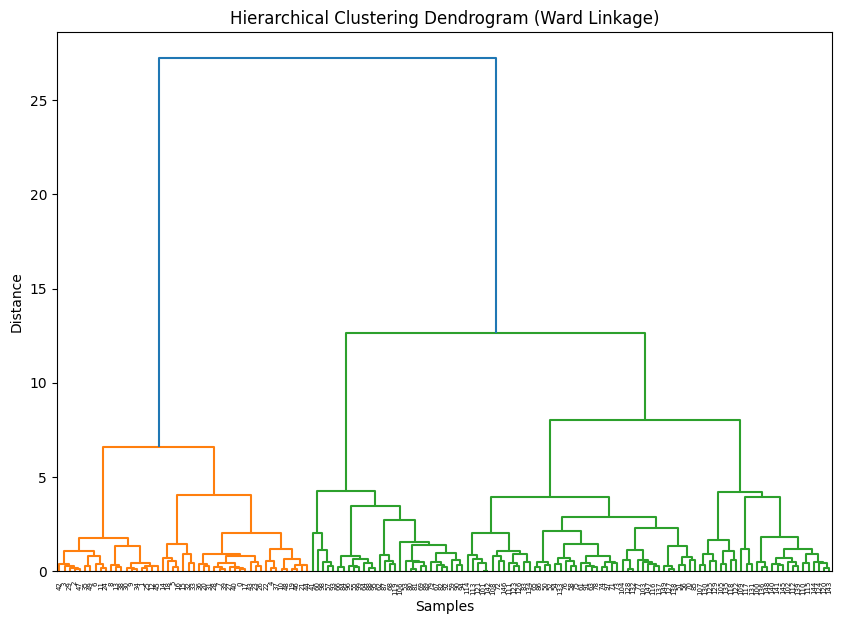

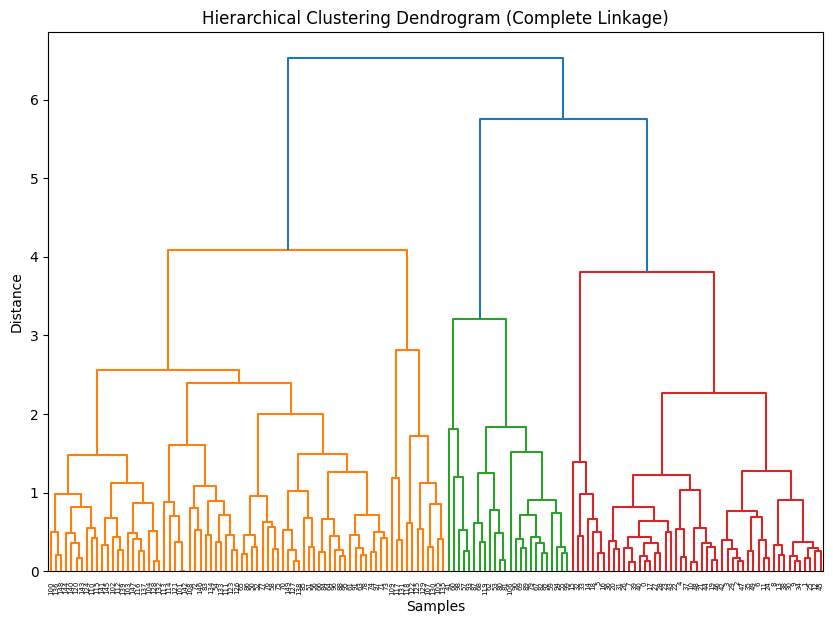

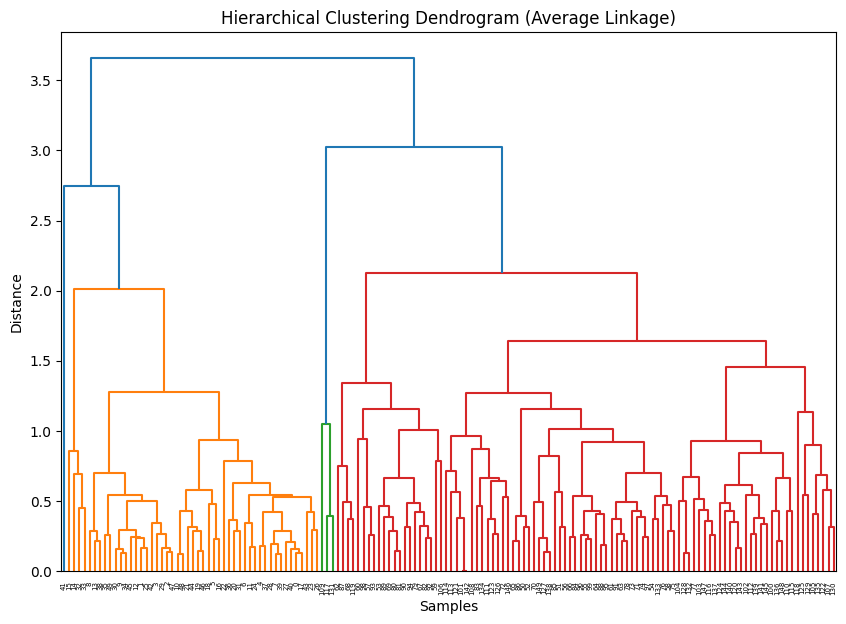

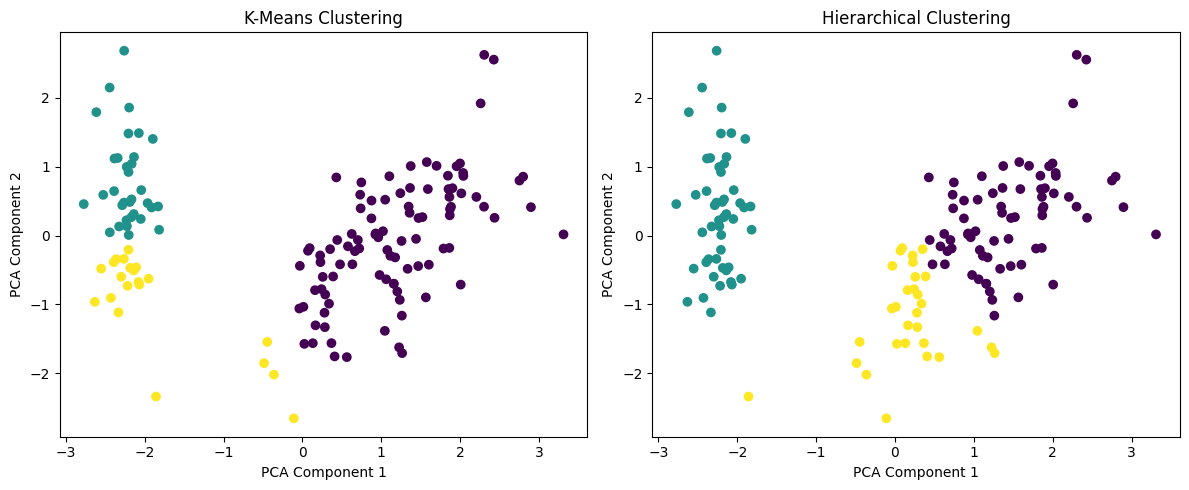

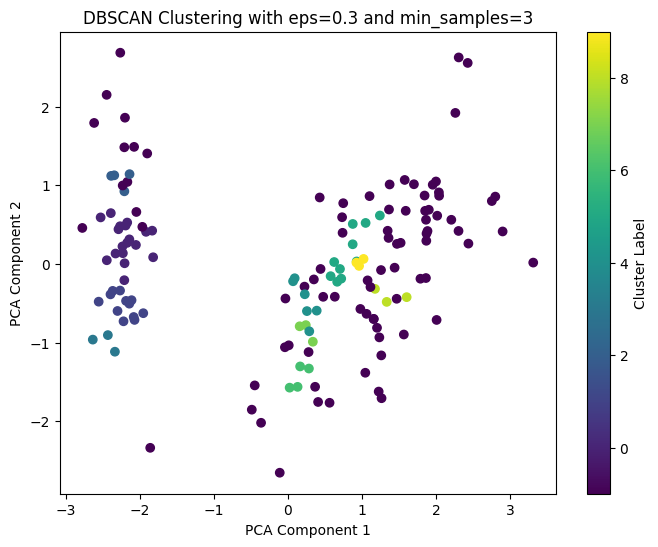

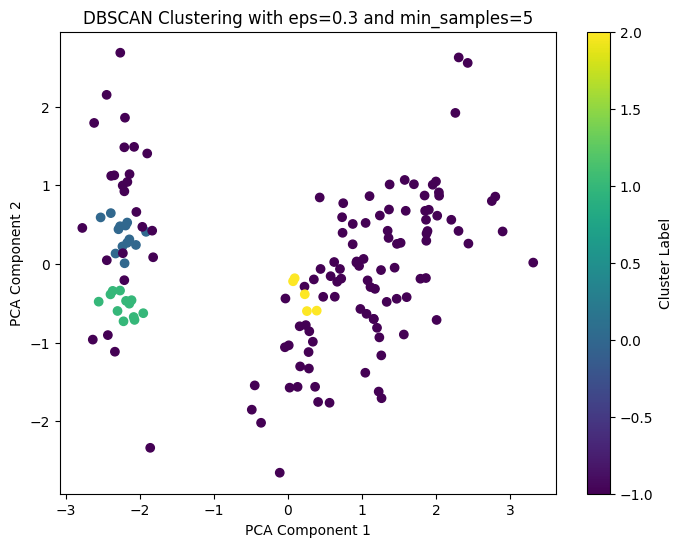

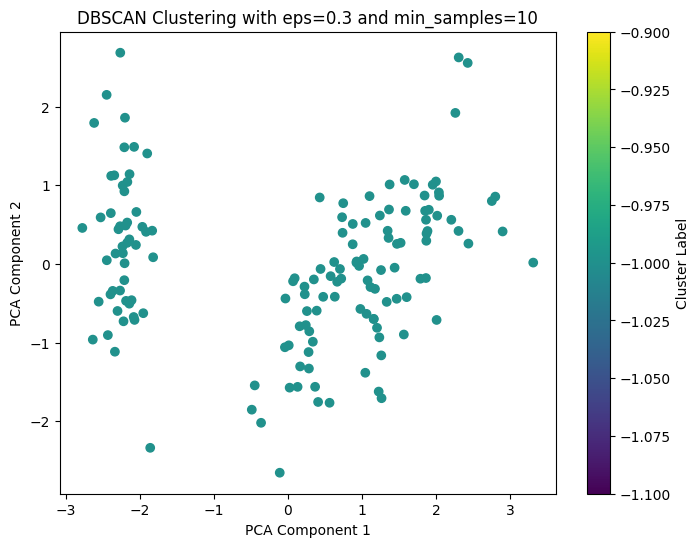

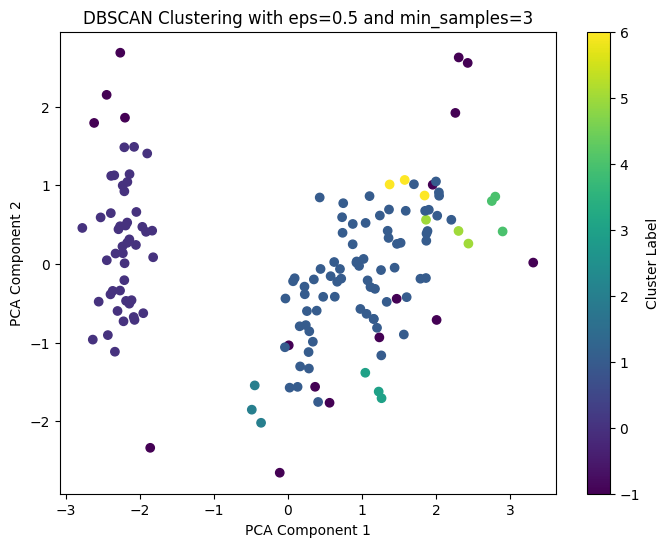

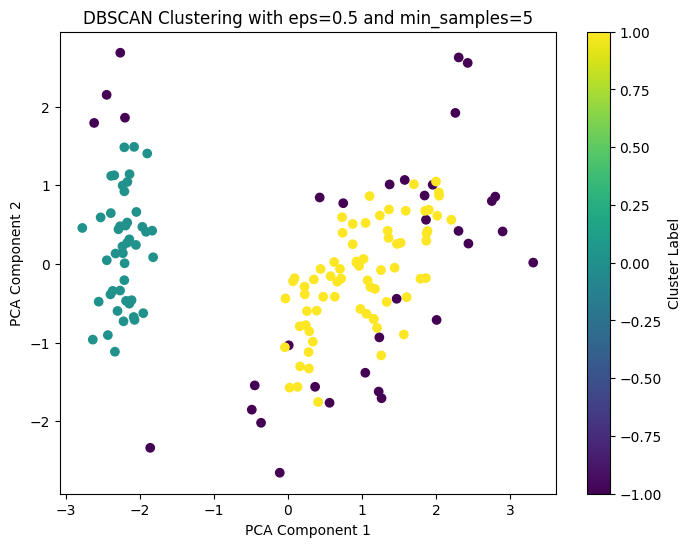

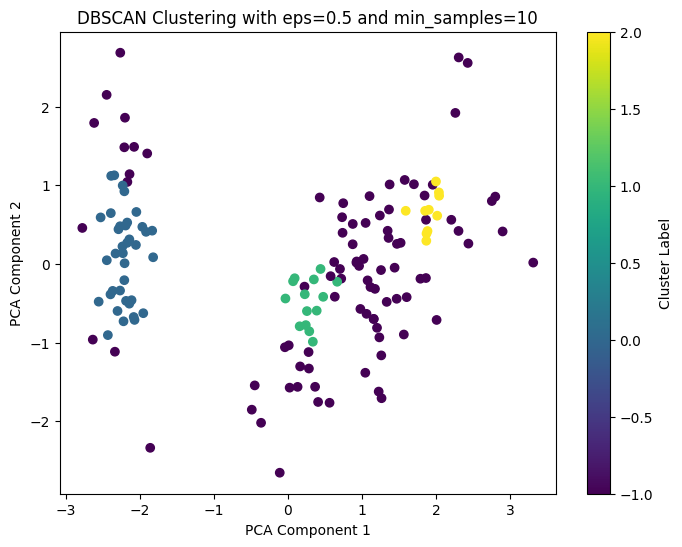

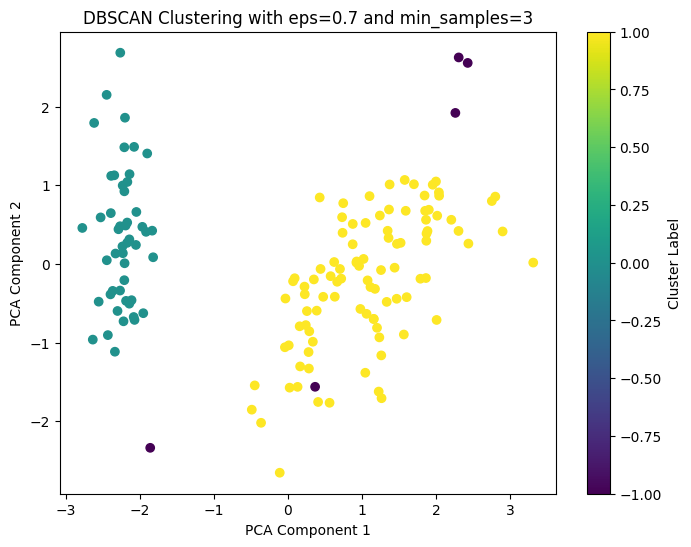

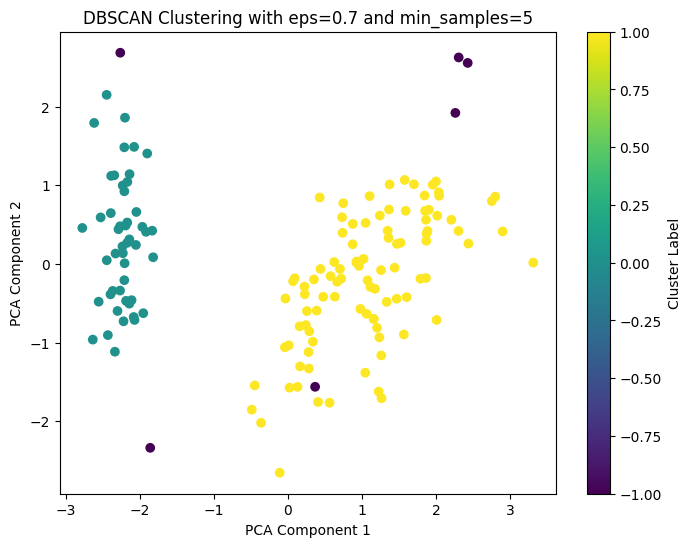

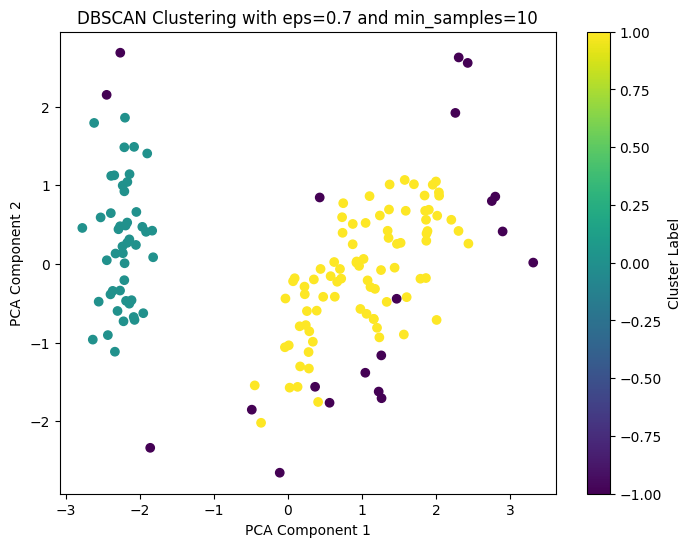

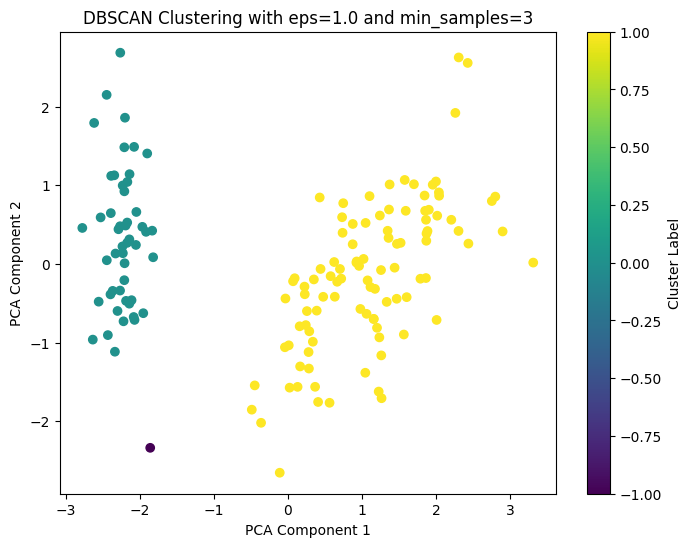

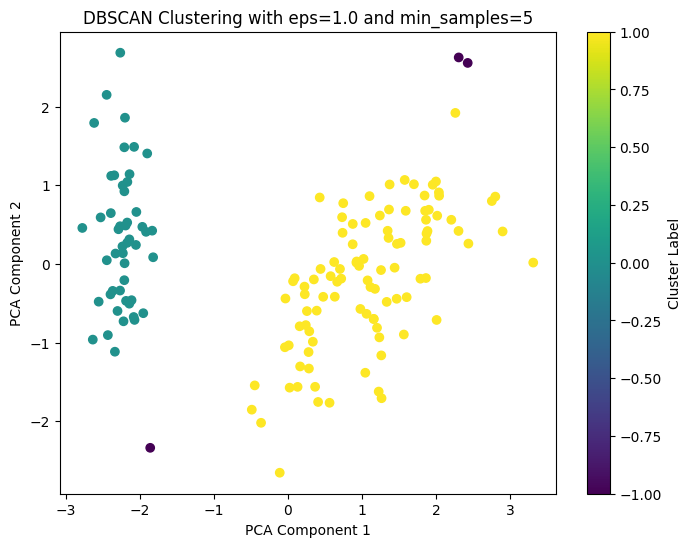

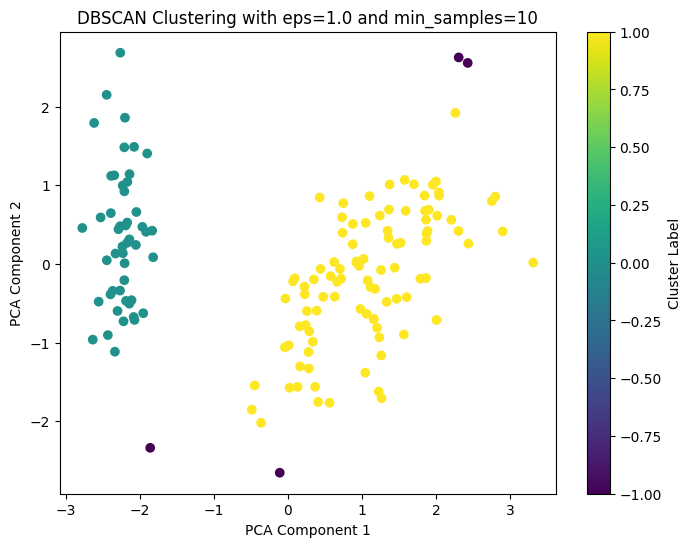

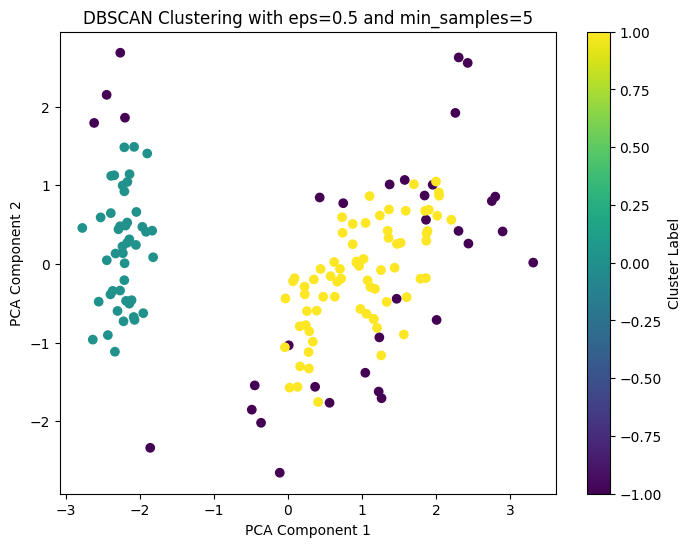

Silhouette Score:
K-Means: 0.480
Hierarchical Clustering: 0.447
DBSCAN: 0.357

Adjusted Rand Index (ARI):
K-Means: 0.433
Hierarchical Clustering: 0.615
DBSCAN: 0.442

V-Measure Score:
K-Means: 0.590
Hierarchical Clustering: 0.675
DBSCAN: 0.511


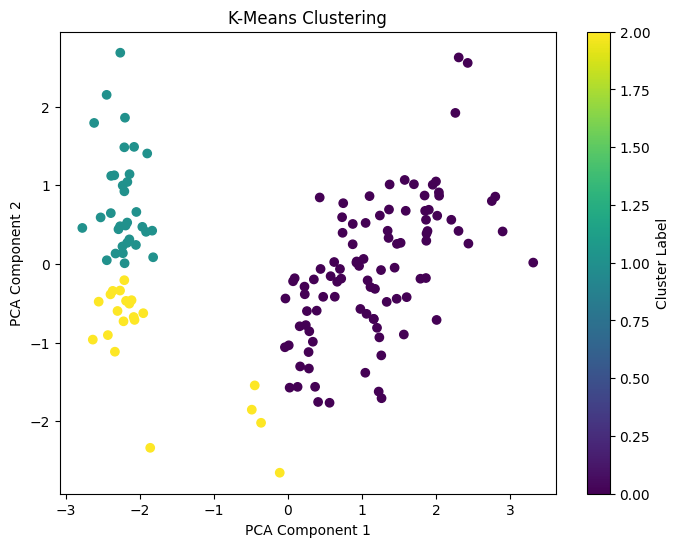

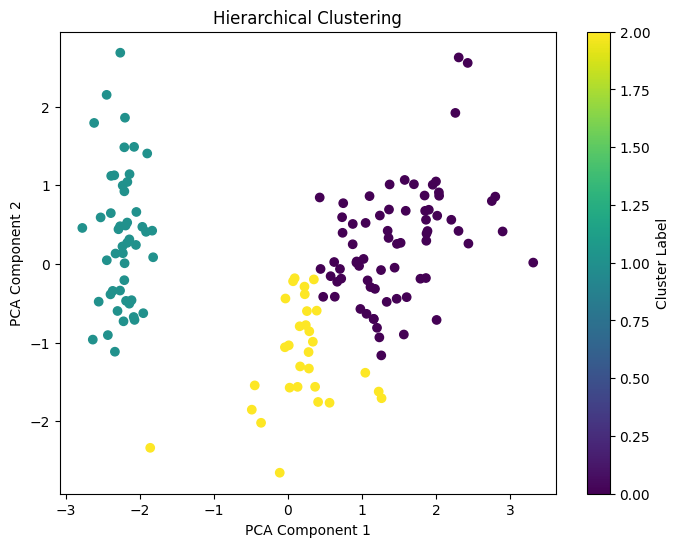

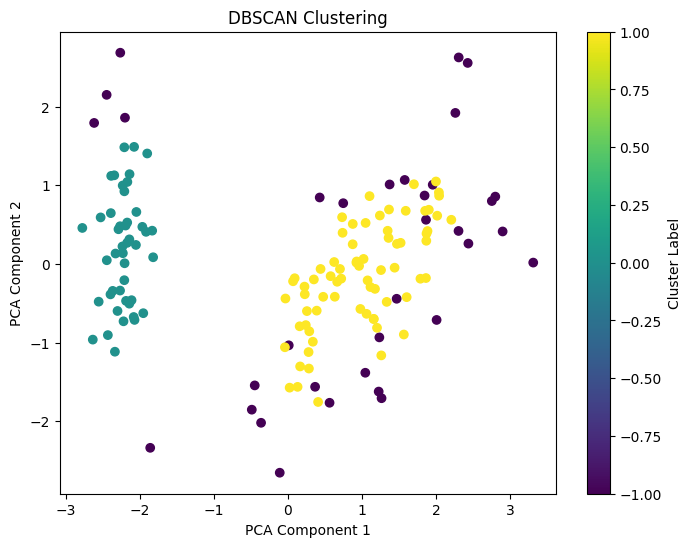

In [ ]:
# Assignment_3 Created by Varinderjeet Kaur
# Student Number:249421330
# Assignment_Tittle:Unsupervised Learning – Clustering

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import v_measure_score
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 1. Data Preparation and Preprocessing

# Load dataset (Iris dataset)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

labels = data.target
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print()
print()

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# EDA: Visualize feature distributions
sns.pairplot(df)
plt.show()
print()
print()

# Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
print()
print()



 #  K-Means Clustering
# Elbow Method to determine optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score to determine optimal number of clusters
sil_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='g')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the Elbow Method and Silhouette Score, assume k=3 is optimal
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
print()

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Display the cluster centroids

print("Cluster Centroids:")
print(centroids)
print()


# PCA for 2D visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', label='Data Points')
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering (k=3) with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()





# Hierarchical Clustering with different linkage criteria
# Ward Linkage
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Complete Linkage
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Average Linkage
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


# Apply Hierarchical Clustering with Ward linkage for 3 clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(df_scaled)

#  Visualization of Clustering Results using PCA

# PCA for 2D visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 5))

# K-Means clustering visualization
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Hierarchical clustering visualization
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()
print()
print()

# Experiment with DBSCAN parameters
# Try a range of eps and min_samples values to find a meaningful clustering
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

# Loop over different eps and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

        # Apply PCA for 2D visualization
        pca = PCA(n_components=2)
        df_pca = pca.fit_transform(df_scaled)

        # Plot the DBSCAN results
        plt.figure(figsize=(8, 6))
        plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
        plt.title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.colorbar(label='Cluster Label')
        plt.show()

# Final chosen parameters based on best results
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Plot final DBSCAN results with chosen parameters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering with eps=0.5 and min_samples=5')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

#  DBSCAN Clustering

# # Experiment with different values of eps and min_samples
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# # Plot the DBSCAN clusters
# sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='DBSCAN_Cluster', data=df, palette='viridis')
# plt.title('DBSCAN Clustering')
# plt.show()

# Calculate Silhouette Scores for each clustering algorithm
sil_kmeans = silhouette_score(df_scaled, df['Cluster'])
sil_hierarchical = silhouette_score(df_scaled, df['Hierarchical_Cluster'])
sil_dbscan = silhouette_score(df_scaled, df['DBSCAN_Cluster'])

# Calculate Adjusted Rand Index (ARI) for comparison to actual labels
ari_kmeans = adjusted_rand_score(labels, df['Cluster'])
ari_hierarchical = adjusted_rand_score(labels, df['Hierarchical_Cluster'])
ari_dbscan = adjusted_rand_score(labels, df['DBSCAN_Cluster'])

# Calculate V-Measure Score
v_measure_kmeans = v_measure_score(labels, df['Cluster'])
v_measure_hierarchical = v_measure_score(labels, df['Hierarchical_Cluster'])
v_measure_dbscan = v_measure_score(labels, df['DBSCAN_Cluster'])

# Print out evaluation metrics
print("Silhouette Score:")
print(f"K-Means: {sil_kmeans:.3f}")
print(f"Hierarchical Clustering: {sil_hierarchical:.3f}")
print(f"DBSCAN: {sil_dbscan:.3f}")

print("\nAdjusted Rand Index (ARI):")
print(f"K-Means: {ari_kmeans:.3f}")
print(f"Hierarchical Clustering: {ari_hierarchical:.3f}")
print(f"DBSCAN: {ari_dbscan:.3f}")

print("\nV-Measure Score:")
print(f"K-Means: {v_measure_kmeans:.3f}")
print(f"Hierarchical Clustering: {v_measure_hierarchical:.3f}")
print(f"DBSCAN: {v_measure_dbscan:.3f}")

# PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Plot Hierarchical clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Hierarchical_Cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Plot DBSCAN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


